# Why learn about Softmax?

Some of you may have experienced a strange problem when working with large datasets (such as MNIST) when you used cross-entropy as your cost function, and sigmoid as your activation function. When these two are paired together, it is possible for the cost to go to infinity (maybe you got some divide by zero errors, and the cost came out to be 'nan'. 'nan' means 'not a number', and it shows up in python when we perform an operation that is undefined (dividing by zero) or we get a number that is super big).













## Revisiting Sigmoid:

Sigmoid, as an activation function, squishes all of our final activations into the range between 0 and 1. The graph can be seen below:

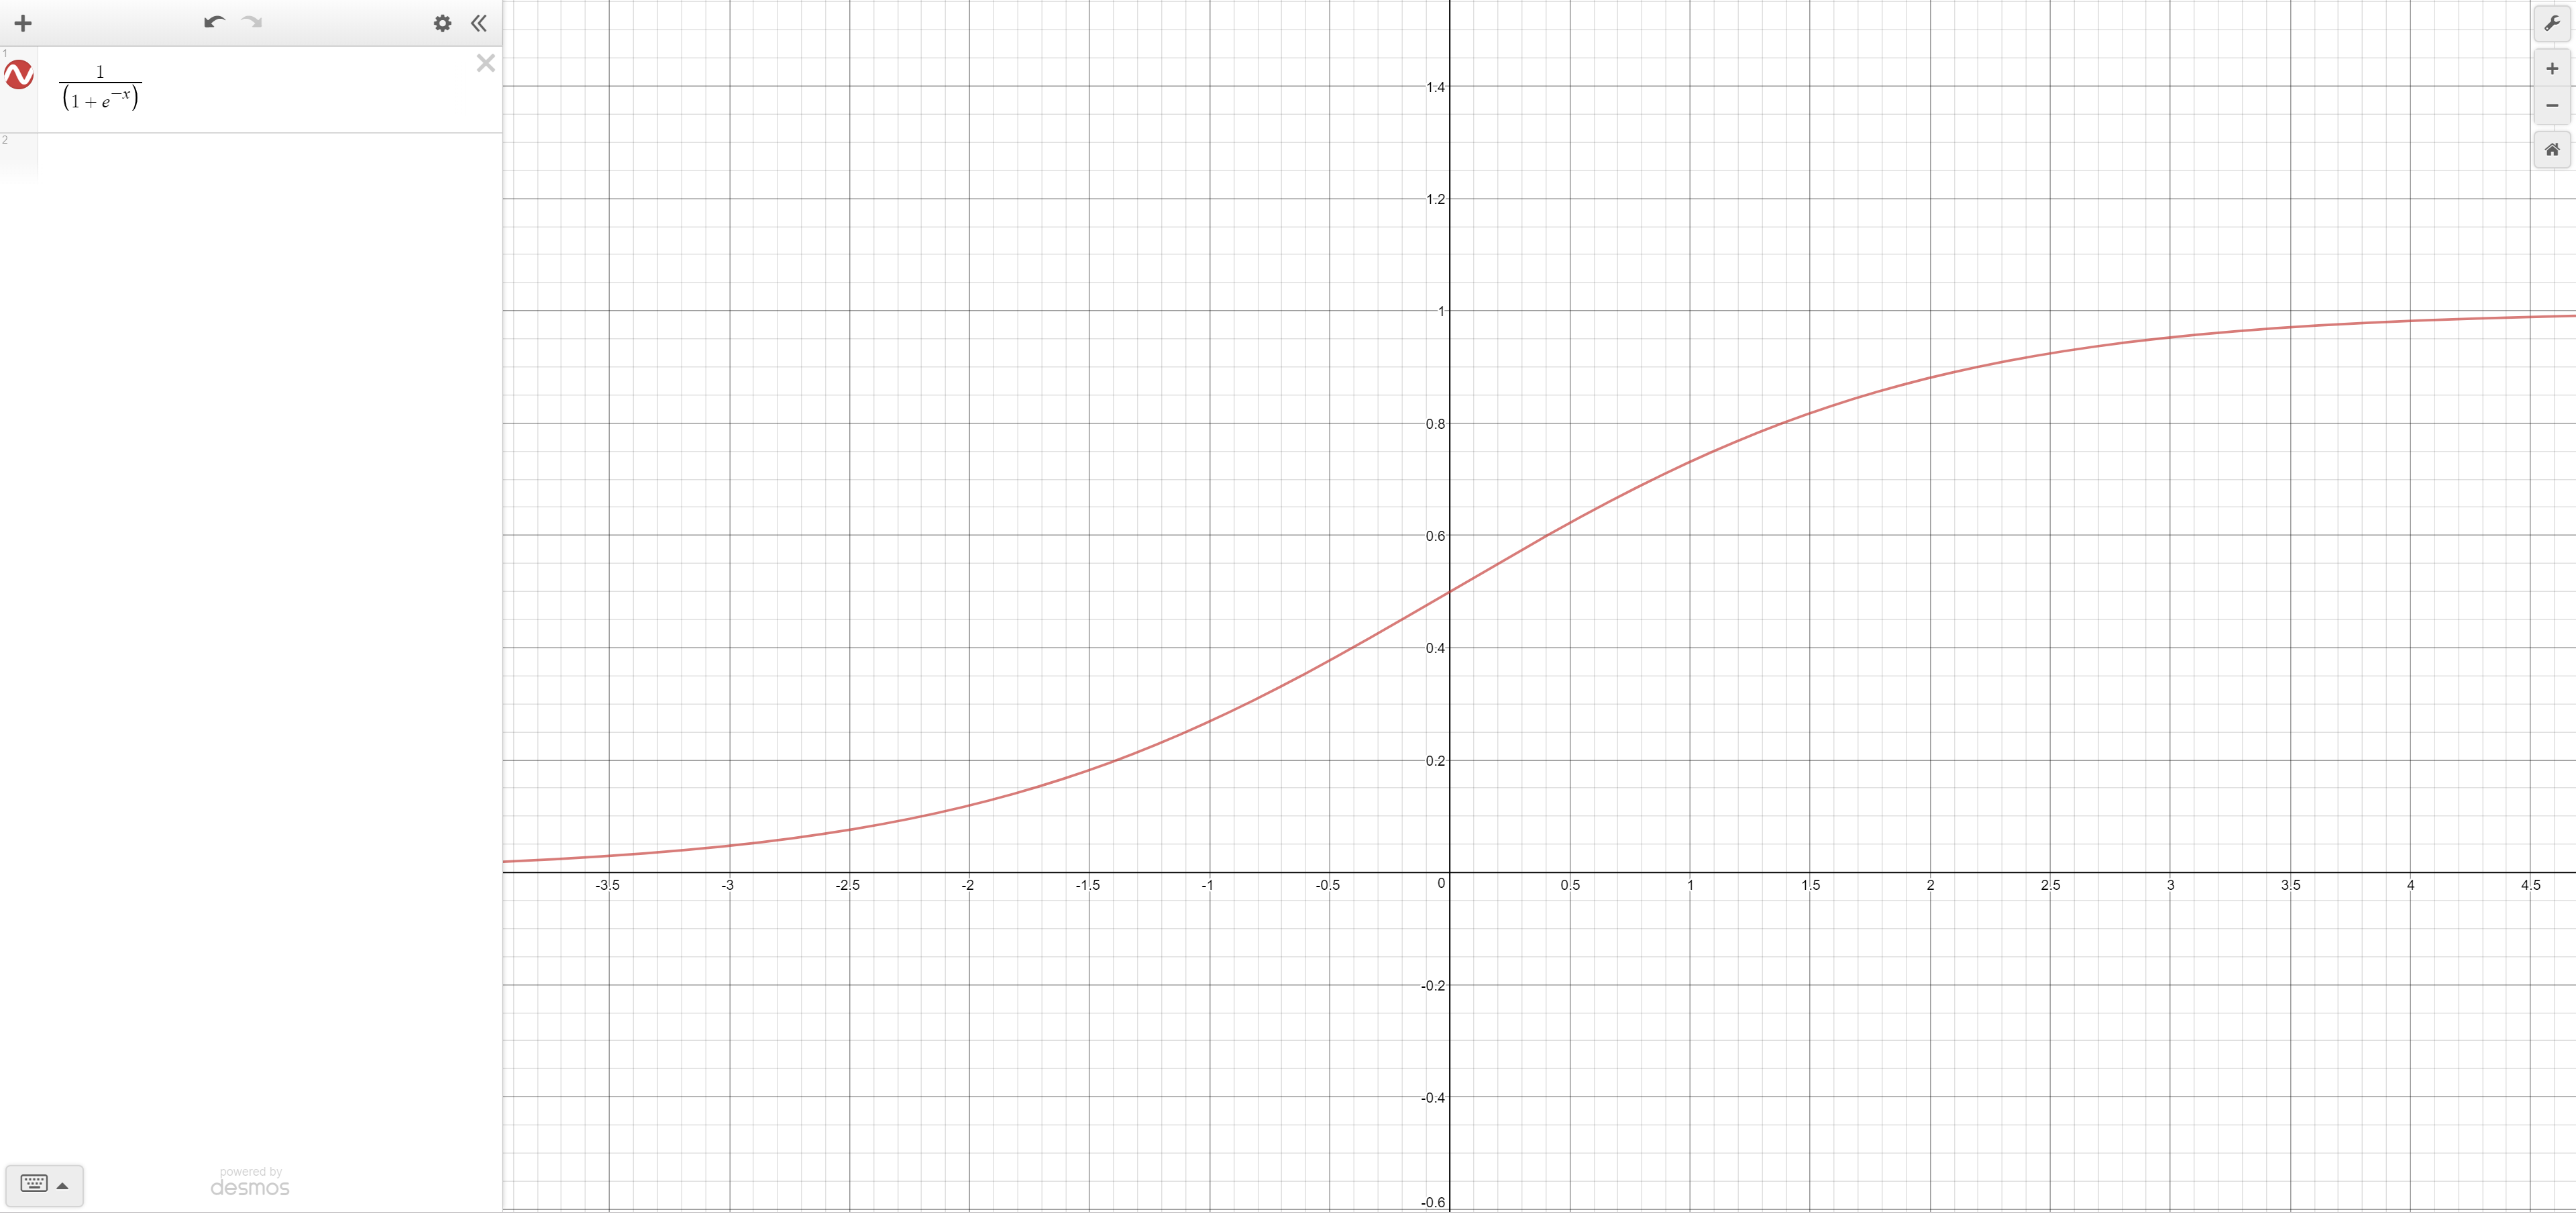

Since the numbers are between 0 and 1, we can think of them as probabilities, which is a requirement for using cross entropy.


## Revisiting Cross Entropy: 

Cross entropy is a cost function, which works when our network outputs probabilities (between 0 and 1). This is why we paired Cross Entropy with sigmoid. However, a better way of representing probability distributions is through the use of the softmax activation function.

First of all, what is a probability distribution? Simply put, we can think of it as a set of probabilities that add to one. For example, [0.1, 0.3, 0.6] would be a valid probability distribution.

Next, what do we mean when we say our network is outputting a probability? Consider the MNIST dataset, where we have 10 possibilities for what digit a given image represents - 0, 1, 2, 3, etc. The final layer of our network has 10 nodes, each representing a possible digit. The activation in one of the final layer nodes should be a probability that the inputted image is the same as the digit that the node represents.

For example, say we input data for a picture representing the digit 7. The one-hot encoded version of our label for this data point would be [0, 0, 0, 0, 0, 0 ,0 ,1, 0, 0]. This means that we want our network to output a probability of 1 in neuron that corresponds to the digit 7, and a 0 in every other neuron.

So, why are there so many errors when using MNIST data, with the cost becoming 'nan' after only 1 or 2 training iterations?
   
When we first input our data into our network, it has no past experience to guide what it does. It is very likely that the network's first guess for a given training example could look something like [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]. This isn't a probability distribution! Our network is predicting with complete 'confidence' that the input digit is every digit at the same time! Our next hope would be that our network can fix this during the training process, but to see why this doesn't happen, let's look at what is going on in our cross-entropy function.


## Cross Entropy Analysis:

Let's assume that we are giving the network a picture of the number 7, and thus the label we give it is [0, 0, 0, 0, 0, 0 ,0 ,1, 0, 0]. If our network were to output [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], let's take a look at what the cost would be.

Cross entropy looks at the label, and finds where the number 1 is. Wherever the number 1 is, the cost for that corresponding neuron in the network's final layer is defined to be -ln(prediction).

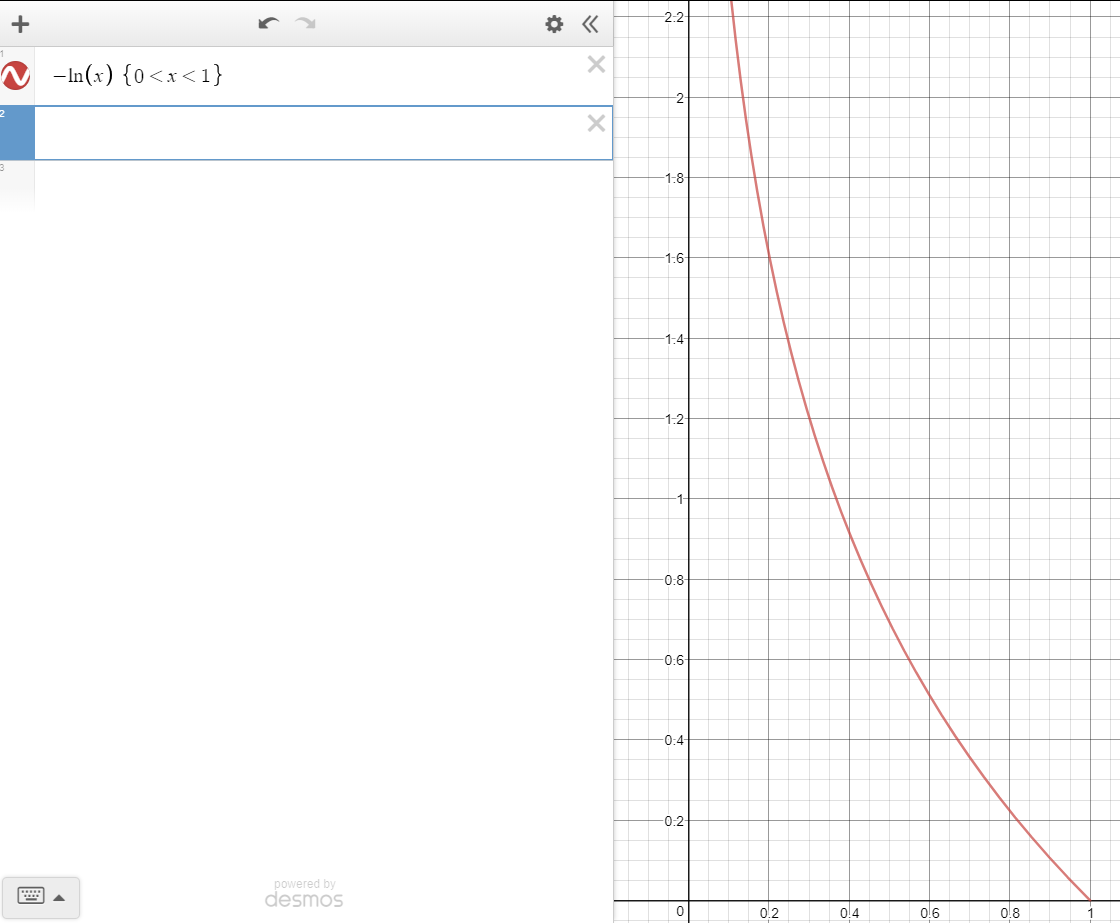

Notice that if our network correctly predicted 1, then the cost would be zero. However, the closer our network's prediction is to zero, the greater our cost


The other possibility is when our label is a zero. When this is the case, the cost for those corresponding neurons in the network's final later is defined to be -ln(1 - prediction). To see why this is the case, look at the graph below.

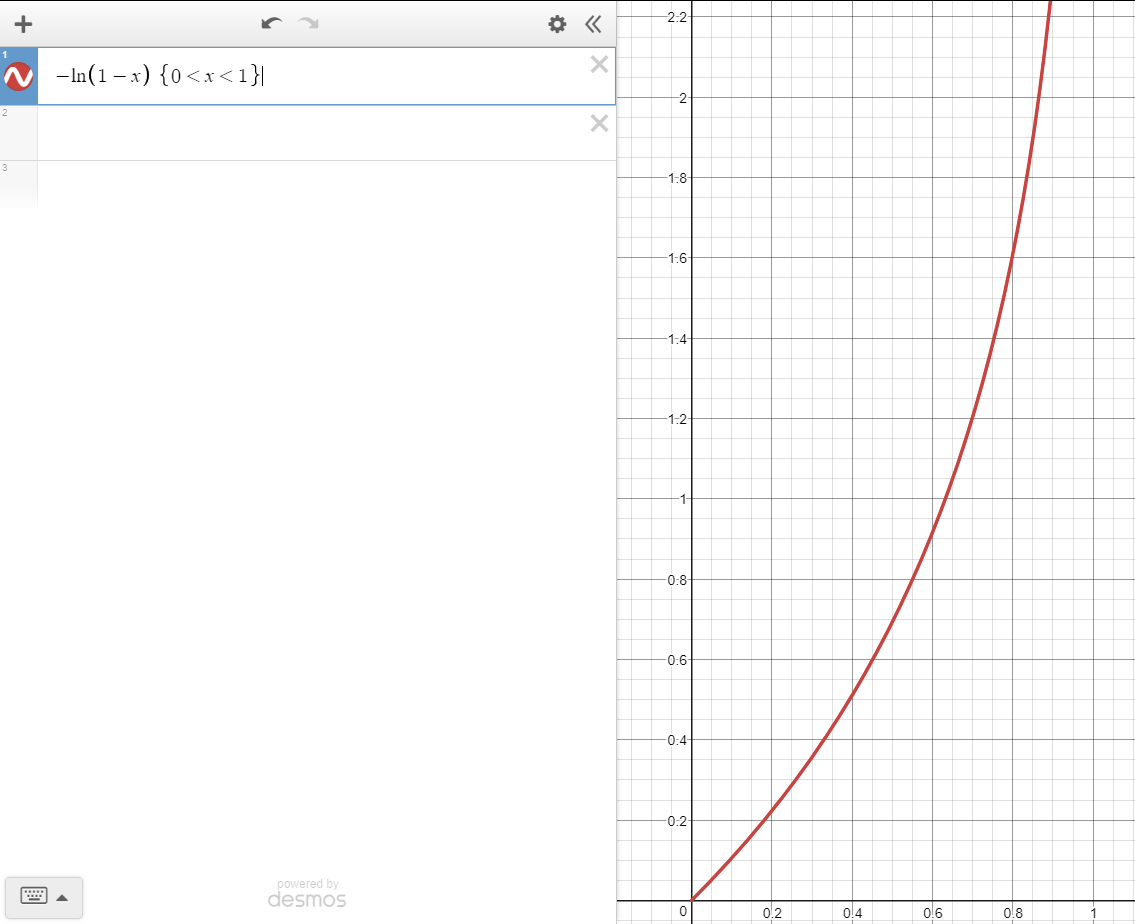

If the true label is 0, and our network predicts 0, the cost would be zero. However, the closer our network's prediction is to one, the greater our cost.


The combination of these two equations provides us a way to evaluate the cost of our network when our activations are probabilities. 

Now, let's go through and compute what the cost would be for the example I provided above.

Everywhere that there is a zero in our label, we'll apply -ln(1-x) to our activation. In the one place where there is a one in our label, we will apply -ln(x) to our activation. For the first 7 indexes and the last 2 indexes in our label ,the correct output is a zero, so we will apply -ln(1-x) to these corresponding indexes of our activation array. At index 7 (the index corresponding to the digit 7), we will apply -ln(x), since the label for this neuron is one. This looks like the following:

#### [-ln(1-1), -ln(1-1), -ln(1-1), -ln(1-1), -ln(1-1), -ln(1-1), -ln(1-1), -ln(1),  -ln(1-1), -ln(1-1)]

You may notice a problem. -ln(1-1) = -ln(0), which is undefined! This is why our network is giving us 'nan', or not a number. Replacing all -ln(0) with nan, our cost would look something like this:

#### [nan, nan, nan, nan, nan, nan, nan, 0, nan, nan]

Our network has no idea what to do with nan, which poses a problem for us. 

### As an excercise, try to implement cross-entropy below

In [2]:
import numpy as np

def cross_entropy(predictions, labels):
    '''
    INPUTS: 
        Prediction - the output of the neural network
        Labels - the desired values for the final layer of the neural network
    
    
    OUTPUTS:
        Cost - the cross-entropy loss of the network
    '''

In [ ]:
label = np.array([0, 0, 1, 0, 0])
prediction = np.array([0.2, 0.07, 0.63, 0.02, 0.08])

cost = cross_entropy(prediction, label)
print(cost)

#EXPECTED OUTPUT: 0.17226680400043487


## A Solution - Softmax <3 (Hooray!)

How could we ever fix this problem? Well, what if we were able to force our network's output to become a probability distribution (when I add up all my final activations, the sum should be equal to 1). If the activations all add together to 1, then we can avoid a situation where every activation is one. For example, in the situation from before where our activation looked like [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], the sum of the activations would be 10, which is much greater than 1. Instead, applying softmax would result in a collection of decimals, which would work well inside of our cross-entropy function. 


Luckily, this is exactly what softmax does!

Softmax as a function looks like this:

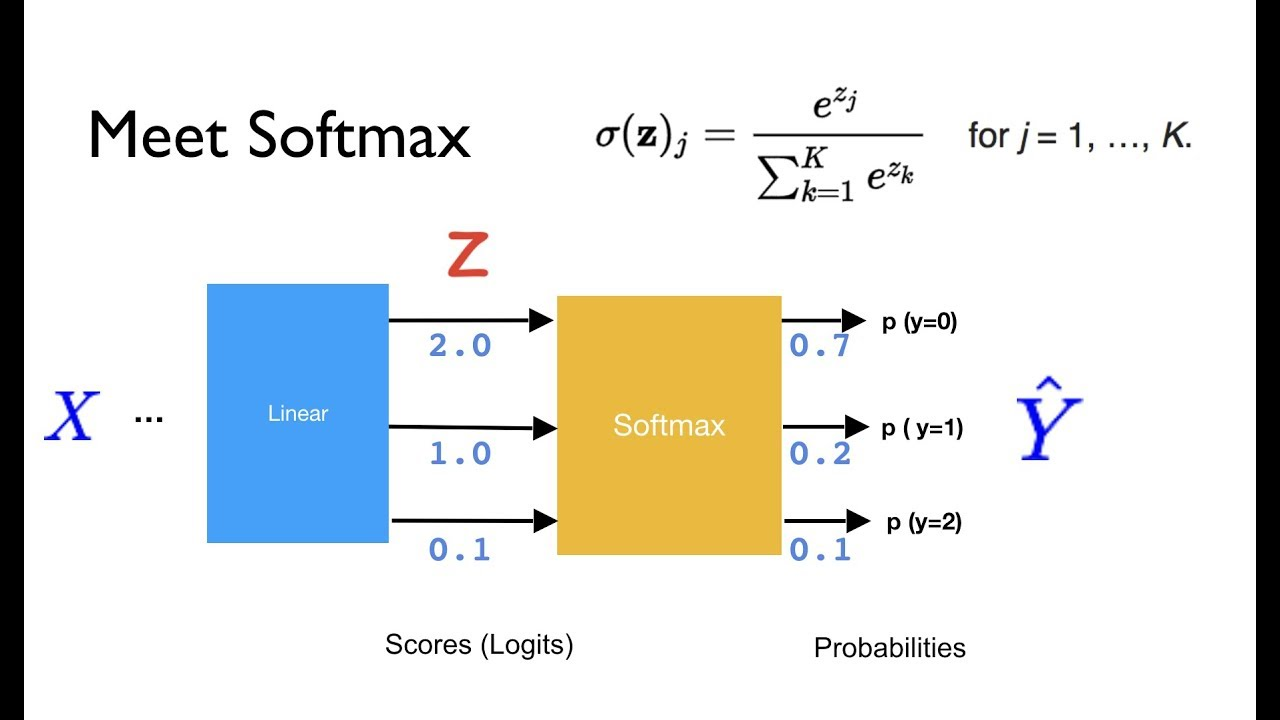

I know it looks scary (mostly because of the summation) but worry not! Let's break it down to see what it is really doing.

Let's assume our network only has 3 output neurons, each representing a different digit (say 0, 1, and 2). Next, let's say that our network's linear activation in the final layer looks like [10, 2, 4]. When we apply softmax to these activations, we will convert each number into a probability. 

One way we could do this is by finding the sum of all our activation (10 + 2 + 4 = 16), and then dividing each number by this sum. If we applied this transformation to our linear activations, we would get (10/16, 2/16, 4/16). If we were to add all of these numbers together, we would get exactly 1, which means that we can think of these numbers as representing a probability distribution. As you can see, the bigger the linear activation, the larger the resultant probability will be.



## As an excercise, implement the normalization described above

In [5]:
def normalize(activations):
    '''
    INPUTS:
        Activations - an array of linear activations
        
    OUTPUTS:
        Normalized Activations - transforms the array so that each index contains a probability corresponding to the relative magnitude of the linear activation
    '''

In [8]:
activation = np.array([12, 16, 21, 4, 42, 32, 26, 53])

normalized_array = normalize(activation)

print(normalized_array)
print(np.sum(normalized_array)) 

#EXPECTED OUTPUT: [0.05825243 0.0776699  0.10194175 0.01941748 0.2038835  0.15533981 0.12621359 0.25728155]
#EXPECTED OUTPUT: 0.9999999999999999 (essentially 1)

None
None


While this is one way we can convert activations into a probability distribution, there are a few problems with it. For example, let's say that in this example where we have 3 classes, our linear activation looked like [1,1,3]. If we applied the method described above, we would end up with [1/5, 1/5, 3/5]. The difference between the 1 and 3 is pretty minor, but since 3 is the largest number it receives the largest probability. Now, consider what would happen if our activations were instead [10, 10, 30]. There is a large difference between a 10 and a 30, and so our network should have near complete confidence that the correct classification is the neuron that holds the 30. However, when we apply the method described above, we end up with [10/50, 10/50, 30/50], which is exactly the same as [1/5, 1/5, 3/5]. Even though the network should have been much more confidence given the significant difference between 10 and 30, it still only associated a 60% probability with the third class.

To fix this, the softmax activation function adds one important step. Before the method I desribed above is applied, the exponentiation function is applied to each activation. Then, these new activations are summed together, and each activation is divided by the resultant sum. 

If that was a little confusing, the best way to see it is through an example. Let's say our activations look like this: [10, 10, 30]. The first step is to exponentiate each activation, which would make our new activations look like this:

$$[e^{10},\: e^{10}, \: e^{30}]$$

Next, we add all of these together, giving us about 1.07 * 10^13. Let's call this number S.

Finally, we will divide each of the exponentiated terms by the sum, giving us: 

$$[\frac{e^{10}}{S},   \frac{e^{10}}{S},   \frac{e^{30}}{S}] = [2.06 * 10^{-9}, 2.06 * 10^{-9}, 0.99999999587]$$

These numbers all add to 1, so they still represent a probability distribution. Also, notice how large the probability is for 30! The softmax function allows us to amplify the differences between linear activations, which fixes the problem we identified above.


## Revisiting an Old Problem

Now, let's walk through one last example to show exactly how softmax would help us avoid problems with the MNIST data, and any other classification-based dataset.

Assume that our linear activations were [100, 100, 100, 100, 150, 100, 100, 100, 100, 100].

If we applied sigmoid to these activations, the resulting array would look like [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]. If we continued forward with this, we would end up having 'nan' errors.

Now, let's apply softmax to this array. The result is [1.92874985e-22, 1.92874985e-22, 1.92874985e-22, 1.92874985e-22, 1.00000000e+00, 1.92874985e-22, 1.92874985e-22, 1.92874985e-22, 1.92874985e-22, 1.92874985e-22]

As you can see, every activation came out to be zero (or very close to zero) except for the index holding 150 (the largest number in the activations) which came out to be 1. When we compute the cross-entropy cost for this array, we will not get any errors, and our problems have been solved.

## Summary

#### All softmax is doing is taking all of your linear activations, exponentiating them, and then converting them to probabilities. Below, you can see compact code that does this all in one line.

Also, in order to back-propagate, you will need to calculate the derivative of the softmax function. I have provided the derivative below.

In [2]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    holder = np.zeros(x.shape)
    for i in range(len(x)):
        holder[i] = np.exp(x[i]) / np.sum(np.exp(x[i], axis=0))
        
    return holder

In [10]:
def softmax_prime(x):
    return softmax(x) * (1 - softmax(x))